In [1]:
#create random data
using Distributions
using Statistics
using LinearAlgebra

#d1 = Normal(mu1, 1)
#d2 = Normal(mu2, 1)

#s = [2 2]
#x = randn(334,1)
y1 = randn(334,1)
y2 = randn(334,1)*2

334×1 Matrix{Float64}:
 -1.4307833648859807
  1.5255078311044525
  2.492455291126251
 -1.276662713123338
 -2.5529964660538984
  2.072801001435967
  1.7046479802483359
  0.11460259013989087
 -0.7385109049140877
 -1.9505794468379007
  0.7873528833639161
  0.19006208051689527
 -0.7707260322314633
  ⋮
 -1.8090214703209402
  4.776112738328781
  5.031397675977455
 -3.6989904817764803
 -0.45515118895673184
 -2.1089548045430444
  2.111607081748978
 -0.4758102001067933
  0.6232868863861056
 -1.7727179331866796
  1.07020492700007
 -0.06421982339951164

In [2]:
data = [y1 y2]

334×2 Matrix{Float64}:
 -1.14775    -1.43078
  2.07175     1.52551
 -0.631863    2.49246
 -0.403237   -1.27666
 -0.0371457  -2.553
  0.0317872   2.0728
 -0.965184    1.70465
  0.980168    0.114603
 -3.02323    -0.738511
 -1.03959    -1.95058
  0.378973    0.787353
  0.461894    0.190062
 -0.18626    -0.770726
  ⋮          
 -0.108725   -1.80902
 -0.567431    4.77611
  0.384018    5.0314
  0.673074   -3.69899
  0.341479   -0.455151
 -0.950487   -2.10895
 -0.0373904   2.11161
 -0.847533   -0.47581
 -2.15662     0.623287
 -0.941222   -1.77272
  1.27977     1.0702
  0.0224913  -0.0642198

In [3]:
#covariance_matrix = cov(data)

covariance_matrix = [4.8881 4.0069; 4.0069 5.0643]

2×2 Matrix{Float64}:
 4.8881  4.0069
 4.0069  5.0643

In [4]:
eig_value = eigvals(covariance_matrix)

2-element Vector{Float64}:
 0.9683315864913926
 8.984068413508606

In [5]:
eig_vecs = eigvecs(covariance_matrix)

2×2 Matrix{Float64}:
 -0.714836  0.699292
  0.699292  0.714836

In [6]:
max_eigval_index = argmax(eig_value)
min_eigval_index = argmin(eig_value)

max_eigval = eig_value[max_eigval_index]
min_eigval = eig_value[min_eigval_index]

0.9683315864913926

In [7]:
#find largest eigen vector 
#eig_vec_norm = zeros(size(eig_vecs)[1])
#for i=1:size(eig_vecs)[1]
#    eig_vec_norm[i] = norm(eig_vecs[:,i])
#end

#println(eig_vec_norm)
#max_eigvec_index = argmax(eig_vec_norm)
#min_eigvec_index = argmin(eig_vec_norm)

max_eigvec = eig_vecs[:, max_eigval_index]
min_eigvec = eig_vecs[:, min_eigval_index]

2-element Vector{Float64}:
 -0.7148362608340606
  0.6992918705353144

In [8]:
max_eigvec

2-element Vector{Float64}:
 0.6992918705353144
 0.7148362608340606

In [9]:
#Calculate angle between x-axis and largest eigenvector 
#x_axis = [1,0]
#angle = acos(dot(max_eigvec, x_axis)/(norm(max_eigvec)*norm(x_axis)))
angle = atan(max_eigvec[2], max_eigvec[1])

0.7963899285212613

In [10]:
if angle<0
    angle = angle + 2*pi;
end

avg = mean(data)

-0.007677723305701778

In [11]:
chisquare_val = 2.4477
theta_grid = 0:0.01:2*pi

phi = angle;
X0= avg
Y0 = avg
a = chisquare_val*sqrt(max_eigval)
b = chisquare_val*sqrt(min_eigval)

ellipse_x = zeros(size(theta_grid)[1], 1)
ellipse_y = zeros(size(theta_grid)[1], 1)

for i=1:size(theta_grid)[1]
    
    #Get ellipse coordinates 
    ellipse_x[i,1] = a*cos(theta_grid[i])
    ellipse_y[i,1] = b*sin(theta_grid[i])
    
end

In [12]:
R = [cos(phi) sin(phi); -sin(phi) cos(phi)];
r_ellipse = [ellipse_x ellipse_y]*R

629×2 Matrix{Float64}:
 5.13042  5.24447
 5.11295  5.26105
 5.09496  5.2771
 5.07647  5.29263
 5.05747  5.30763
 5.03796  5.32209
 5.01795  5.33603
 4.99743  5.34943
 4.97642  5.3623
 4.95491  5.37463
 4.9329   5.38642
 4.9104   5.39767
 4.88741  5.40839
 ⋮        
 5.29206  5.02067
 5.28048  5.04308
 5.26838  5.06498
 5.25574  5.08638
 5.24259  5.10727
 5.2289   5.12765
 5.2147   5.14751
 5.19997  5.16686
 5.18473  5.18569
 5.16896  5.20401
 5.15268  5.2218
 5.13588  5.23907

In [13]:
using GLMakie

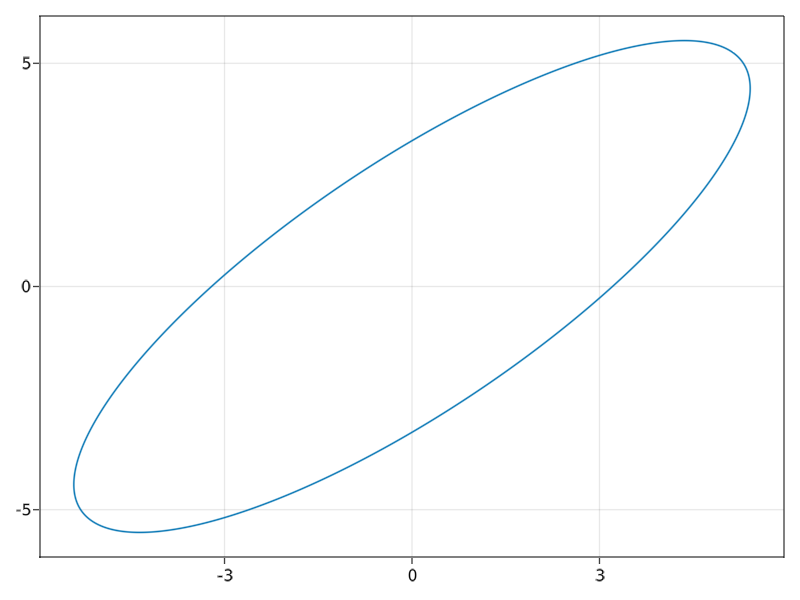

In [14]:
lines(r_ellipse[:,1], r_ellipse[:,2])